# dp100_18 機械学習モデルの選択自動化

自動機械学習では、データを使用して複数のアルゴリズムと前処理変換を試すことができる。  
これをスケーラブルなクラウドベースのコンピューティングを組み合わせることで、他の場合には必要になる、  
膨大な時間のかかる手動による試行錯誤を行うことなく、データに最適なパフォーマンスのモデルを見つけることができる。

Azure MLには、*Enterprise*エディションのワークスペース専用AzureMLスタジオのビジュアルインターフェイスを介した自動機械学習のサポートが含まれている。  
SDKを使用して、*Basic*または*Enterprise*エディションのワークスペースのいずれかで、自動機械学習の実験を実行できる。

## 自動機械学習のタスクとアルゴリズム

AzureMLの自動機械学習を使用して、以下の機械学習の作業用にモデルをトレーニングできる。

- 分類
- 回帰
- 時系列予測

### タスク固有のアルゴリズム

AzureMLには、これらのタスクに一般的に使用される多数のアルゴリズムのサポートが含まれている。  
一覧については右記URL参照 : https://aka.ms/AA70rrr

### アルゴリズムの選択を成約する

規定では、自動機械学習は指定されたタスク用にすべてのアルゴリズムからランダムに選択されるが、除外設定ができる。  
これは、データが特定の種類のアルゴリズムに適していないことがわかっている場合、  
または組織で使用できる機械学習アルゴリズムの種類を制限するポリシーに準拠する必要がある場合に役立つ。

## 前処理と特徴づけ

自動機械学習では、選択したアルゴリズムを試してみるだけでなく、データの前処理変換と、モデルのパフォーマンスの向上を適用することができる。

### スケーリングと正規化

自動機械学習では、数値データに対してスケーリングと正規化が自動的に適用される。  
これは、大規模な特徴量でトレーニングの多くが占められるのを防ぐために役立つ。  
自動機械学習の実験時には、複数のスケーリングおよび正規化の技法が適用される。

### オプションの特徴づけ

自動機械学習で、たとえば次のような前処理変換の適用を選択できる。

- トレーニングデータセット内のnull値を削除するための欠損値補完
- カテゴリ別の特徴を数値インジケータに変換するカテゴリ別エンコード
- 高カーディナリティ機能(レコードIDなど)の削除
- 特徴エンジニアリング(たとえば、DateTimeの特徴から個々の日付部分を派生させるなど)
- その他

> 自動機械学習での前処理のサポート : https://aka.ms/AA70rrt

## 自動機械学習の実験を実行する

### 自動機械学習の実験を構成する

ユーザインターフェイスを使用すると、自動機械学習の実験のオプションを直感的に選択することができる。  
SDKを使用すると、次の例で示すように柔軟性が向上し、**AutoMLConfig**クラスを使用して実験オプションを設定できる。

```
from azureml.train.automl import AutoMLConfig

automl_run_config = RunConfiguration(framework='python')
automl_config = AutoMLConfig(name='Automated ML Experiment',
                             task='classification',
                             primary_metric = 'AUC_weighted',
                             compute_target=aml_compute,
                             training_data = train_dataset,
                             validation_data = test_dataset,
                             label_column_name='Label',
                             featurization='auto',
                             iterations=12,
                             max_concurrent_iterations=4)
```

#### トレーニング用のデータを指定する

自動機械学習は、データを指定するだけでモデルのトレーニングに最適な方法をAzureMLに見つけさせることができるように設計されている。  
SDKを使用して自動機械学習の実験を実行する場合は、次の方法でデータを送信できる。

- 予測する特徴及びラベルを含む"トレーニングデータ"のデータセットまたはデータフレームを指定する
- 必要に応じて、トレーニングされたモデルの検証に使用する2番目の"検証データ"のデータセットまたはデータフレームを指定  
これが指定されない場合、AzureMLはトレーニングデータを使用してクロス検証を適用する

あるいは、

- トレーニングする特徴を含むデータセット、データフレーム、または*X*値のNumPy配列と、それに対応するラベル値の配列*y*を指定する
- 必要に応じて、検証に使用する*X_valid*と*y_valid*のデータセット、データフレーム、または*X_valid*値のNumPy配列を指定する

#### プライマリメトリックを指定する

指定する必要がある最も重要な設定の1つは**primary_metric**で、これは最適なモデルを決定するためのターゲットのパフォーマンスメトリック。  
AzureMLでは、タスクの種類ごとに一連の名前付きメトリックがサポートされている。  
特定の種類のタスクに使用可能なメトリックの一覧を取得するには、以下のように**get_primary_metrics**を使用できる。

```
from azureml.train.automl.utilities import get_primary_metrics

get_primary_metrics('classification')
```

> プライマリメトリックについての詳細URL : https://aka.ms/AA70rrw

### 自動機械学習の実験を送信する

他のSDKベースの実験と同様、自動機械学習の実験も送信できる。

```
from azureml.core.experiment import Experiment

automl_experiment = Experiment(ws, 'automl_experiment')
automl_run = automl_experiment.submit(automl_config)
```

自動機械学習の実験の実行は、スタジオまたはノートブック上で**RunDetails**ウィジェットで監視できる。

### 最適な実行とそのモデルを取得する

最適な実行はスタジオで簡単に特定でき、それによって生成されるモデルをダウンロードまたはデプロイできる。  
SDKを使用して、これをプログラムで実現するには以下のようなコードを使用する。

```
best_run, fitted_model = automl_run.get_output()
best_run_metrics = best_run.get_metrics()
for metric_name in best_run_metrics:
    metric = best_run_metrics[metric_name]
    print(metric_name, metric)
```

### 前処理手順を確認する

自動機械学習では、scikit-learnパイプラインを使用してモデルと共に前処理手順をカプセル化する。  
次のようなコードを使用して、最適な実行から取得した適合モデル内の手順を表示することができる。

```
for step_ in fitted_model.named_steps:
    print(step_)
```

## 演習 自動機械学習を使用する

SDKでは自動機械学習実験の設定をより細かく制御することができるが、ビジュアルインターフェイスのほうが使いやすい

### 始める前に

**azureml-train-automl**パッケージが必要なので、以下のセルを実行してパッケージがインストールされていることを確認する。

In [1]:
!pip show azureml-train-automl

Name: azureml-train-automl
Version: 1.28.0
Summary: automl
Home-page: https://docs.microsoft.com/python/api/overview/azure/ml/?view=azure-ml-py
Author: Microsoft Corp
Author-email: None
License: https://aka.ms/azureml-sdk-license
Location: /anaconda/envs/azureml_py36/lib/python3.6/site-packages
Requires: azureml-train-automl-runtime, azureml-train-automl-client, azureml-automl-runtime, azureml-dataset-runtime, azureml-automl-core
Required-by: azureml-automl-dnn-nlp


### ワークスペースの接続

In [2]:
import azureml.core
from azureml.core import Workspace

# Load the workspace from the saved config file
ws = Workspace.from_config()
print('Ready to use Azure ML {} to work with {}'.format(azureml.core.VERSION, ws.name))

Ready to use Azure ML 1.28.0 to work with 20210613


### データの準備

In [3]:
from azureml.core import Dataset

default_ds = ws.get_default_datastore()

if 'diabetes dataset' not in ws.datasets:
    default_ds.upload_files(files=['./data/diabetes.csv', './data/diabetes2.csv'], # Upload the diabetes csv files in /data
                        target_path='diabetes-data/', # Put it in a folder path in the datastore
                        overwrite=True, # Replace existing files of the same name
                        show_progress=True)

    #Create a tabular dataset from the path on the datastore (this may take a short while)
    tab_data_set = Dataset.Tabular.from_delimited_files(path=(default_ds, 'diabetes-data/*.csv'))

    # Register the tabular dataset
    try:
        tab_data_set = tab_data_set.register(workspace=ws, 
                                name='diabetes dataset',
                                description='diabetes data',
                                tags = {'format':'CSV'},
                                create_new_version=True)
        print('Dataset registered.')
    except Exception as ex:
        print(ex)
else:
    print('Dataset already registered.')


# Split the dataset into training and validation subsets
diabetes_ds = ws.datasets.get("diabetes dataset")
train_ds, test_ds = diabetes_ds.random_split(percentage=0.7, seed=123)
print("Data ready!")

Dataset already registered.
Data ready!


### コンピューティングの準備

In [4]:
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException

cluster_name = "msl-20210613b"

try:
    # Check for existing compute target
    training_cluster = ComputeTarget(workspace=ws, name=cluster_name)
    print('Found existing cluster, use it.')
except ComputeTargetException:
    # If it doesn't already exist, create it
    try:
        compute_config = AmlCompute.provisioning_configuration(vm_size='STANDARD_DS11_V2', max_nodes=2)
        training_cluster = ComputeTarget.create(ws, cluster_name, compute_config)
        training_cluster.wait_for_completion(show_output=True)
    except Exception as ex:
        print(ex)
    

Found existing cluster, use it.


### 自動機械学習の設定

最も重要な設定の一つは、モデルのパフォーマンスを評価するためのメトリック。  
以下のように、特定のタイプのモデルタスク(分類または回帰)について、自動機械学習によって計算されるメトリックのリストを取得することができる。

In [5]:
import azureml.train.automl.utilities as automl_utils

for metric in automl_utils.get_primary_metrics('classification'):
    print(metric)

accuracy
norm_macro_recall
AUC_weighted
precision_score_weighted
average_precision_score_weighted


最適化したい指標(今回はAUC_weighted)を決定したら、自動機械学習の実行を設定するが、そのためにはAutoMLの設定が必要。  
この設定では、対象となる指標の外、使用するデータや試行する組み合わせの数などのオプションを指定する。

> この例では実験にかかる時間を短縮するために、実験回数を4回に制限している。実際にはもっと多くの試行回数を重ねることになる

In [6]:
from azureml.train.automl import AutoMLConfig

automl_config = AutoMLConfig(name='Automated ML Experiment',
                             task='classification',
                             compute_target=training_cluster,
                             training_data = train_ds,
                             validation_data = test_ds,
                             label_column_name='Diabetic',
                             iterations=4,
                             primary_metric = 'AUC_weighted',
                             max_concurrent_iterations=2,
                             featurization='auto'
                             )

print("Ready for Auto ML run.")

Ready for Auto ML run.


### 自動機械学習の実験を実行

実行するのに時間がかかることに注意。

In [7]:
from azureml.core.experiment import Experiment
from azureml.widgets import RunDetails

print('Submitting Auto ML experiment...')
automl_experiment = Experiment(ws, 'mslearn-diabetes-automl-sdk')
automl_run = automl_experiment.submit(automl_config)
RunDetails(automl_run).show()
automl_run.wait_for_completion(show_output=True)

Submitting Auto ML experiment...
Submitting remote run.


Experiment,Id,Type,Status,Details Page,Docs Page
mslearn-diabetes-automl-sdk,AutoML_3718f87a-900a-498b-91fe-4d58ec9708d1,automl,NotStarted,Link to Azure Machine Learning studio,Link to Documentation


_AutoMLWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', 's…

Experiment,Id,Type,Status,Details Page,Docs Page
mslearn-diabetes-automl-sdk,AutoML_3718f87a-900a-498b-91fe-4d58ec9708d1,automl,NotStarted,Link to Azure Machine Learning studio,Link to Documentation



Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetFeaturizationCompleted. Completed fit featurizers and featurizing the dataset.
Current status: ModelSelection. Beginning model selection.

****************************************************************************************************
DATA GUARDRAILS: 

TYPE:         Class balancing detection
STATUS:       PASSED
DESCRIPTION:  Your inputs were analyzed, and all classes are balanced in your training data.
              Learn more about imbalanced data: https://aka.ms/AutomatedMLImbalancedData

****************************************************************************************************

TYPE:         Missing feature values imputation
STATUS:       PASSED
DESCRIPTION:  No feature missing values were detected in the training data.
              Learn more about missing value imputation: https://aka.ms/AutomatedMLFeaturization

*******************************************************

{'runId': 'AutoML_3718f87a-900a-498b-91fe-4d58ec9708d1',
 'target': 'msl-20210613b',
 'status': 'Completed',
 'startTimeUtc': '2021-06-15T23:53:59.864291Z',
 'endTimeUtc': '2021-06-16T00:04:40.053956Z',
 'properties': {'num_iterations': '4',
  'training_type': 'TrainFull',
  'acquisition_function': 'EI',
  'primary_metric': 'AUC_weighted',
  'train_split': '0',
  'acquisition_parameter': '0',
  'num_cross_validation': None,
  'target': 'msl-20210613b',
  'AMLSettingsJsonString': '{"path":null,"name":"Automated ML Experiment","subscription_id":"153404fd-72ab-4092-b50e-de490c5509fc","resource_group":"20210613","workspace_name":"20210613","region":"westus2","compute_target":"msl-20210613b","spark_service":null,"azure_service":"remote","many_models":false,"pipeline_fetch_max_batch_size":1,"enable_batch_run":false,"enable_run_restructure":false,"start_auxiliary_runs_before_parent_complete":false,"enable_code_generation":false,"iterations":4,"primary_metric":"AUC_weighted","task_type":"class

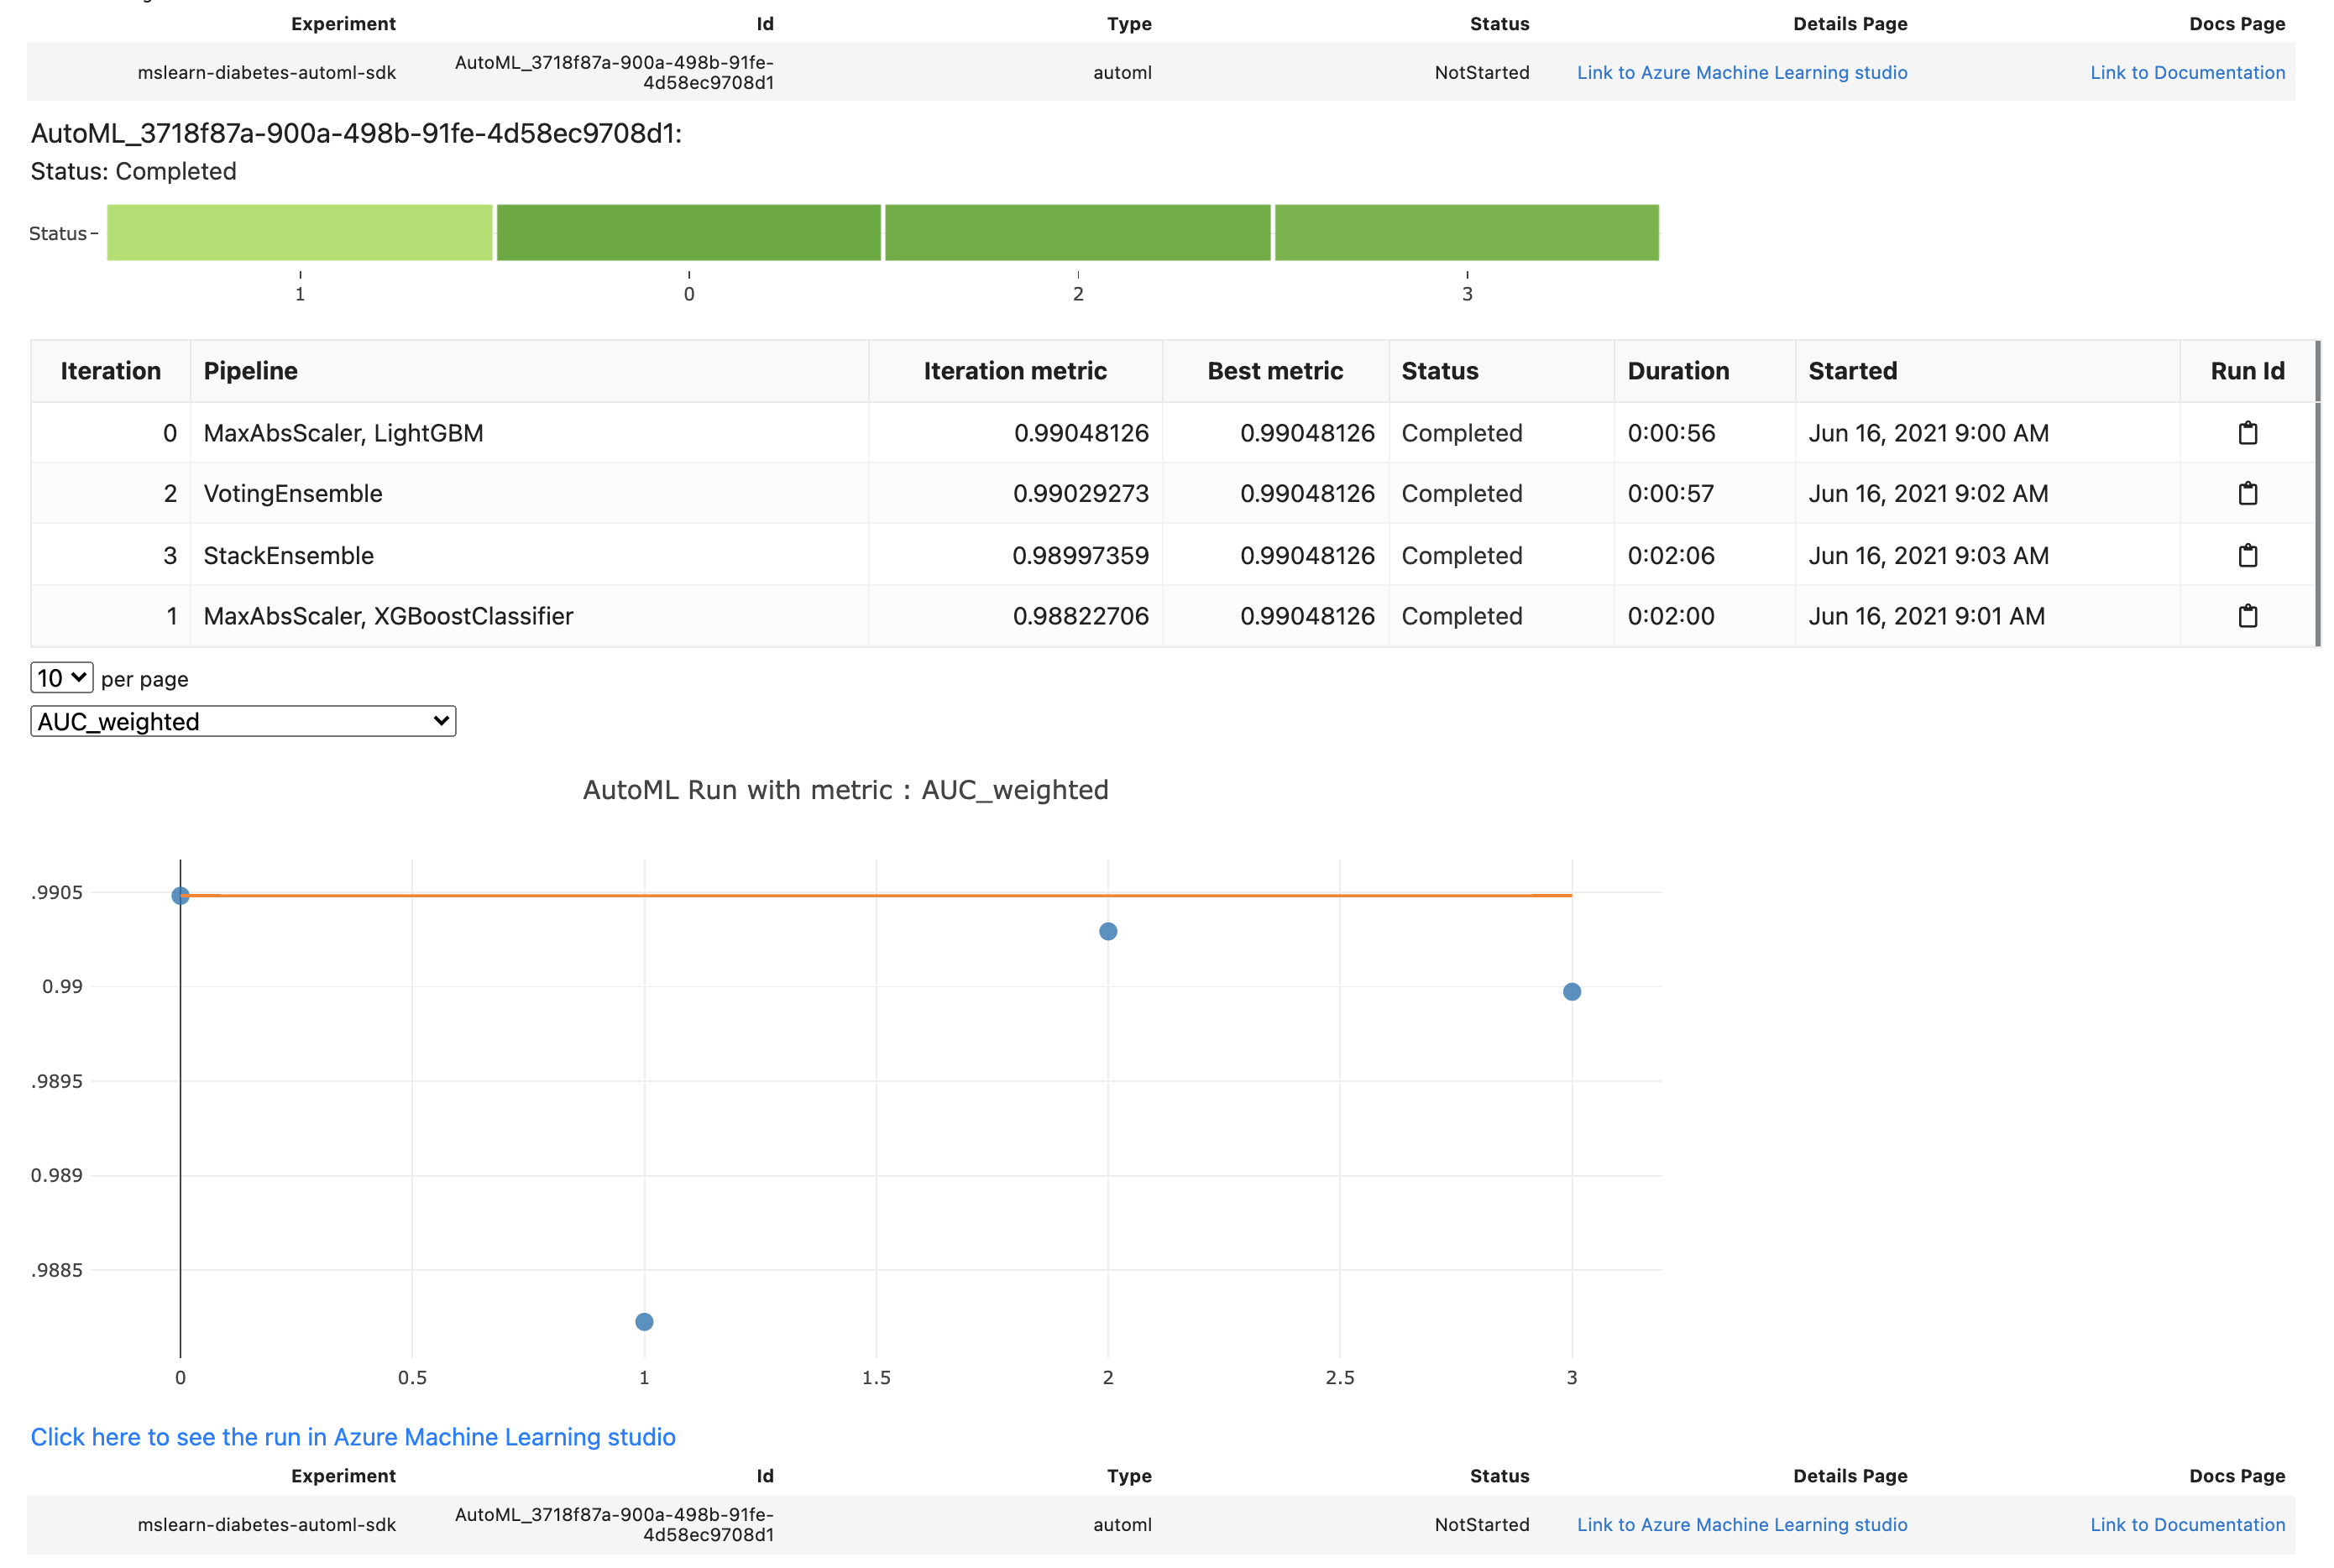

### 子実行の詳細を見る

実験が完了したら、ウィジェットで出力を表示し、最良の結果を出した実行をクリックしてその詳細を確認する。

次に、スタジオで実験の詳細リンクをクリックして実験全体の詳細を表示してから、最良の結果を出した子実行の詳細を表示する。  
ここには、生成されたモデルのパフォーマンスに関する多くの情報がある。

また、SDKを用いてすべての子実行を取得し、そのメトリックを表示することもできる。

In [8]:
for run in automl_run.get_children():
    print('Run ID', run.id)
    for metric in run.get_metrics():
        print('\t', run.get_metrics(metric))

Run ID AutoML_3718f87a-900a-498b-91fe-4d58ec9708d1_3
	 {'f1_score_micro': 0.6672665916760405}
	 {'norm_macro_recall': 0.0}
	 {'AUC_micro': 0.8848363133460961}
	 {'precision_score_micro': 0.6672665916760405}
	 {'log_loss': 0.622911336509194}
	 {'weighted_accuracy': 0.8008628809959982}
	 {'AUC_weighted': 0.9899735884308848}
	 {'precision_score_weighted': 0.4452447043669598}
	 {'average_precision_score_macro': 0.9884282918097484}
	 {'f1_score_macro': 0.400215895290784}
	 {'AUC_macro': 0.9899735884308847}
	 {'recall_score_macro': 0.5}
	 {'balanced_accuracy': 0.5}
	 {'recall_score_micro': 0.6672665916760405}
	 {'average_precision_score_micro': 0.899829044672247}
	 {'f1_score_weighted': 0.534101392770513}
	 {'accuracy': 0.6672665916760405}
	 {'recall_score_weighted': 0.6672665916760405}
	 {'average_precision_score_weighted': 0.9905884640781419}
	 {'precision_score_macro': 0.33363329583802026}
	 {'matthews_correlation': 0.0}
	 {'confusion_matrix': 'aml://artifactId/ExperimentRun/dcid.AutoML_3

> 自動機械学習の詳細URL : https://docs.microsoft.com/azure/machine-learning/how-to-configure-auto-train

## 知識チェック

1. 自動機械学習を使用して、くちばしと翼の測定値を基に、ペンギンの種類を予測するモデルをトレーニングしています。  
自動機械学習には、どの種類のタスクを指定する必要がありますか?

    - 回帰
    - 予測
    - 分類

2. 自動機械学習を使用して、最適な AUC_weighted メトリックのモデルを探したいと考えています。  
AutoMLConfig オブジェクトのどのパラメーターを設定すればよいですか?

    - task='AUC_weighted'
    - label_column_name= 'AUC_weighted'
    - primary_metric='AUC_weighted'

↓解答

1. 分類
    - クラスを予測するには、分類タスクが必要です。

2. primary_metric='AUC_weighted'
    - プライマリ メトリックを、モデルを最適化するパフォーマンス スコアに設定します。